In [21]:
import pandas as pd

epc_registry = pd.read_csv('data\epc_register\ei_javni_register_feb24.csv', sep='|')

print(epc_registry.head(10).to_string())
epc_registry.dtypes


  ID energetske izkaznice Datum izdelave    Velja do  Šifra KO  Številka stavbe  Številka dela stavbe Tip izkaznice  Potrebna toplota za ogrevanje  Dovedena energija za delovanje stavbe Celotna energija Dovedena električna energija Primarna energija  Emisije CO2  Kondicionirana površina stavbe Energijski razred
0     2023-854-336-105359     24.05.2023  24.05.2033       582               13                   0.0      računska                           48.0                                    1.0              NaN                            1                 1          0.0                         183.000                 C
1     2023-751-286-105127     16.05.2023  16.05.2033      1077             1527                   1.0      računska                           74.0                                    3.0              NaN                            1                 7          1.0                          72.000                 D
2       2023-550-9-104610     24.04.2023  24.04.2033      178

ID energetske izkaznice                   object
Datum izdelave                            object
Velja do                                  object
Šifra KO                                   int64
Številka stavbe                            int64
Številka dela stavbe                     float64
Tip izkaznice                             object
Potrebna toplota za ogrevanje            float64
Dovedena energija za delovanje stavbe    float64
Celotna energija                          object
Dovedena električna energija              object
Primarna energija                         object
Emisije CO2                              float64
Kondicionirana površina stavbe           float64
Energijski razred                         object
dtype: object

In [4]:
import pandas as pd

# re_cadastre = pd.read_csv('data\\re_cadastre\\KN_SLO_STAVBE_SLO_deli_stavb_20240225.csv', sep=',')

# re_cadastre = pd.read_csv('data\\re_cadastre\\KN_SLO_STAVBE_SLO_imetniki_lastnistva_20240225.csv', sep=',')

# re_cadastre = pd.read_csv('data\\re_cadastre\\KN_SLO_STAVBE_SLO_osebe_dst_20240225.csv', sep=',')

# re_cadastre = pd.read_csv('data\\re_cadastre\\KN_SLO_STAVBE_SLO_pravice_lastnistva_dst_20240225.csv', sep=',')

# re_cadastre = pd.read_csv('data\\re_cadastre\\KN_SLO_STAVBE_SLO_prostori_20240225.csv', sep=',')

re_cadastre = pd.read_csv('data\\re_cadastre\\KN_SLO_STAVBE_SLO_upravljavci_dst_20240225.csv', sep=',')

# re_cadastre = pd.read_csv('data\\re_cadastre\\KN_SLO_STAVBE_SLO_upravljavci_x_deli_stavb_20240225.csv', sep=',')

# re_cadastre = pd.read_csv('data\\re_cadastre\\KN_SLO_STAVBE_SLO_upravniki_20240225.csv', sep=',')

# cadastre_desc = pd.read_excel('data\\re_cadastre\\Struktura_KN_lastniki_PO_daljice.xlsx')

print(re_cadastre.head(10).to_string())


               FEATUREID  UPRAVLJAVEC_ID                                                                   NAZIV    MS_OSEBE  EID_HISNA_STEVILKA  PRISTOJNI_ORGAN  VRSTA_UPRAVLJAVCA_ID            DATUM_SYS  VELJAVNOST_OD VELJAVNOST_DO
0  UPRAVLJAVCI_DST.10001           10001                                         PARK ŠKOCJANSKE JAME, Slovenija  1121715000        1.004000e+17              NaN                     1  2023-03-07T18:08:52            NaN           NaN
1  UPRAVLJAVCI_DST.10006           10006                                                            OBČINA TRZIN  1358561000        1.004000e+17              NaN                     2  2023-03-07T18:08:52            NaN           NaN
2  UPRAVLJAVCI_DST.10013           10013                                                            OBČINA MIRNA  2399164000        1.004000e+17              NaN                     2  2023-03-07T18:08:52            NaN           NaN
3  UPRAVLJAVCI_DST.10015           10015  MINISTRSTVO ZA OKOLJE 

                   FEATUREID          EID_STAVBA   KO_ID  ST_STAVBE  STEVILO_ET  STEVILO_ST  TIP_STAVBE  ELEKTRIKA  PLIN  VODOVOD  KANALIZACI  LETO_IZGRA  LETO_OBNOV  LETO_OBNO0  VISINA_H1  VISINA_H2  VISINA_H3  POLOZAJNA_  VISINSKA_N  NOSILNA_KO   DATUM_SYS  VISINSKI_D  STATUS_VPI  STEVILO_PO  BRUTO_TLOR          EID_OBCINA                      geometry
0  STAVBE.100200000250893316  100200000250893316  2551.0        1.0         1.0         0.0         1.0        1.0   0.0      1.0         2.0      1993.0         NaN         NaN        NaN      653.0      645.8           2           0           1  2022-05-30           1           3         1.0         NaN  110200000110277170  POINT (437354.500 41927.860)
1  STAVBE.100200000250893985  100200000250893985  2551.0        8.0         2.0         1.0         1.0        1.0   0.0      1.0         2.0      2000.0         NaN         NaN      613.9      623.4      613.9           1           0           2  2022-12-22           1           1    

<Axes: >

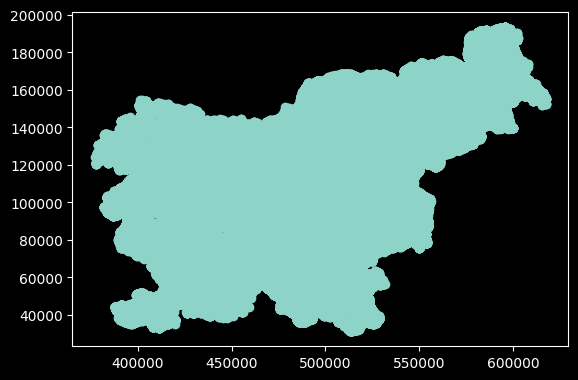

In [1]:
import geopandas

gdf = geopandas.read_file('data\\re_cadastre\\spatial\\KN_SLO_STAVBE_SLO_stavbe_20240225\\KN_SLO_STAVBE_SLO_STAVBE_tocka.shp')

print(gdf.head(10).to_string())
print(gdf.dtype)

# print(gdf.crs)

gdf.plot()


In [23]:
import pandas as pd
import geopandas

epc_registry = pd.read_csv('data\epc_register\ei_javni_register_feb24.csv', sep='|')
epc_registry = epc_registry[['ID energetske izkaznice', 'Šifra KO', 'Številka stavbe', 'Številka dela stavbe', 'Energijski razred']]

re_cadastre = geopandas.read_file('data\\re_cadastre\\spatial\\KN_SLO_STAVBE_SLO_stavbe_20240225\\KN_SLO_STAVBE_SLO_STAVBE_tocka.shp')

result = geopandas.GeoDataFrame(pd.merge(epc_registry, re_cadastre, how='inner', left_on=['Šifra KO', 'Številka stavbe'], right_on=['KO_ID', 'ST_STAVBE']))

result = result.rename(columns={'ID energetske izkaznice': 'EPC_ID',
                                'Šifra KO': 'KO_ID',
                                'Številka stavbe': 'ST_STAVBE',
                                'Številka dela stavbe': 'ST_DEL_STAVBE',
                                'Energijski razred': 'EPC_RATING',
                                })

print(result.head(10).to_string())

result = result.loc[:, ~result.columns.duplicated()]

result.to_parquet('model\\processed_data.parquet', engine='pyarrow')


                EPC_ID  KO_ID  ST_STAVBE  ST_DEL_STAVBE EPC_RATING                  FEATUREID          EID_STAVBA   KO_ID  ST_STAVBE  STEVILO_ET  STEVILO_ST  TIP_STAVBE  ELEKTRIKA  PLIN  VODOVOD  KANALIZACI  LETO_IZGRA  LETO_OBNOV  LETO_OBNO0  VISINA_H1  VISINA_H2  VISINA_H3  POLOZAJNA_  VISINSKA_N  NOSILNA_KO   DATUM_SYS  VISINSKI_D  STATUS_VPI  STEVILO_PO  BRUTO_TLOR          EID_OBCINA                       geometry
0  2023-854-336-105359    582         13            0.0          C  STAVBE.100200000232540936  100200000232540936   582.0       13.0         3.0         1.0         1.0        1.0   0.0      1.0         2.0      1900.0         NaN      2002.0        NaN      350.3      342.2           2           0           1  2022-12-22           1           3         0.0         NaN  110200000110274409  POINT (549781.580 170625.960)
1  2023-751-286-105127   1077       1527            1.0          D  STAVBE.100200000253203307  100200000253203307  1077.0     1527.0         4.0         1

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_parquet('model\\processed_data.parquet')


y = data['EPC_RATING']

X = data[['TIP_STAVBE', 'ELEKTRIKA', 'PLIN', 'VODOVOD', 'KANALIZACI', 'LETO_IZGRA', 'LETO_OBNOV', 'LETO_OBNO0']]


y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train_encoded)

predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, predictions)


predictions_original = label_encoder.inverse_transform(predictions)


results_df = pd.DataFrame({
    'True Labels': y_test, 
    'Predictions': predictions_original 
})

print(results_df.head(100).to_string())
print(f'Accuracy: {accuracy}')


ValueError: could not convert string to float: '2018-362-286-64133'